## **Importing libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

2025-10-24 13:21:21.057366: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 13:21:21.861236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-24 13:21:24.076663: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Verifying the GPU Setup [tensorflow + CUDA (Compute Unified Device Architecture) => Let's you use GPU for Computation other than Graphics]

In [2]:
# !python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

## **Data Preprocessing**
#### Used *'https://youtube.com/playlist?list=PLvz5lCwTgdXDNcXEVwwHsb9DwjNXZGsoy&si=gPCwVkKpS63FVLAC'* for guidance

# Training Image Preprocessing

In [3]:
os.getcwd()

'/home/root123/GitHub/Two_Months_ML_Journey/Week 4'

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    './data/PlantVillage_Cleaned/split_data/train',
    labels="inferred", # leaving inferred, keras generates labels and class name automatically i.e.,
    # [Pepper_mold, Potato_healthy, Tomato_healthy, ...] alphabetically, where labels [0, 1, 2, ...]
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=40,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 24652 files belonging to 15 classes.


I0000 00:00:1761291458.348740    1556 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


## Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    './data/PlantVillage_Cleaned/split_data/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=40,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 5278 files belonging to 15 classes.


In [6]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

# **Building Model**

In [7]:
cnn = Sequential()

## Building Convolution Layers (Architecture)

In [8]:
# 🧠 CNN Concept Summary:

# 1️⃣ Each cnn.add() = one layer (Conv, Pool, etc.)
#     → Conv2D = learns features (edges → textures → shapes)
#     → MaxPool2D = downsamples feature maps (keeps strongest features)

# 2️⃣ Repeated Conv+Pool blocks = deeper understanding:
#     Block1: basic edges/colors
#     Block2: shapes/textures
#     Block3: complex leaf patterns
#     Block4: disease regions

# 3️⃣ Kernel (3x3): small filter sliding over input
#     → detects local patterns (like edge fragments)

# 4️⃣ padding='same': adds zero borders → output height & width stay same
#     padding='valid': no padding → output shrinks

# 5️⃣ input_shape: only needed in the first Conv2D layer
#     → later layers infer input size automatically

# 6️⃣ Max Pooling (2x2): reduces feature map size by half
#     → keeps key activations, adds translation invariance

# 7️⃣ Hierarchy summary:
#     Input → Conv → Pool → Conv → Pool → Flatten → Dense → Output


In [9]:
cnn.add(Conv2D(filters=32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128, 3])) # input_size = [widht, height, input shape]
cnn.add(Conv2D(filters=32, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(MaxPool2D(pool_size = 2, strides = 2)) # pool size -> shape of pooling filter, strides -> movement of sliding window

/home/root123/GitHub/Two_Months_ML_Journey/Week 4/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.add(Conv2D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(Conv2D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(MaxPool2D(pool_size = 2, strides = 2))

In [11]:
cnn.add(Conv2D(filters=128, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(Conv2D(filters=128, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn.add(MaxPool2D(pool_size = 2, strides = 2))

In [12]:
# cnn.add(Conv2D(filters=256, kernel_size = 3, padding = 'same', activation = 'relu'))
# cnn.add(Conv2D(filters=256, kernel_size = 3, padding = 'same', activation = 'relu'))
# cnn.add(MaxPool2D(pool_size = 2, strides = 2))

In [13]:
# Flattening the results to pass to the dense layer
cnn.add(Flatten())

In [14]:
cnn.add(Dense(units = 64, activation = 'relu'))

In [15]:
# output layer
cnn.add(Dense(units = 15, activation = 'softmax'))

## Compiling Model

In [16]:
cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', Precision(), Recall()])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,385,199 (9.10 MB)

 Trainable params: 2,385,199 (9.10 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [19]:
training_history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.9740 - loss: 0.0818 - precision: 0.9753 - recall: 0.9721 - val_accuracy: 0.9070 - val_loss: 0.4499 - val_precision: 0.9123 - val_recall: 0.9049
Epoch 2/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.9736 - loss: 0.0798 - precision: 0.9757 - recall: 0.9719 - val_accuracy: 0.8793 - val_loss: 0.6011 - val_precision: 0.8865 - val_recall: 0.8757
Epoch 3/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.9734 - loss: 0.0885 - precision: 0.9755 - recall: 0.9720 - val_accuracy: 0.9070 - val_loss: 0.4346 - val_precision: 0.9123 - val_recall: 0.9049
Epoch 4/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9805 - loss: 0.0631 - precision: 0.9813 - recall: 0.9796 - val_accuracy: 0.8871 - val_loss: 0.6198 - val_precision: 0.8921 - val_recall: 0.8846
Epoch 5/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9805 - loss: 0.0627 - precision: 0.9813 - recall: 0.9795 - val_accuracy: 0.8840 - va

## Model Evaluation

In [23]:
train_loss, train_acc, train_pre, train_rec = cnn.evaluate(training_set)

771/771 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9897 - loss: 0.0407 - precision: 0.9899 - recall: 0.9895


In [24]:
print(train_loss, train_acc, train_pre, train_rec)

0.040742792189121246 0.9897371530532837 0.989935040473938 0.9894531965255737


In [25]:
valid_loss, valid_acc, valid_pre, valid_rec = cnn.evaluate(validation_set)

165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9003 - loss: 0.6768 - precision: 0.9025 - recall: 0.8998


In [26]:
print(valid_loss, valid_acc, valid_pre, valid_rec)

0.6767751574516296 0.9003410339355469 0.902508556842804 0.8997726440429688


## Accuracy Visualization

In [33]:
print(training_history.history['accuracy'])

[0.9740386009216309, 0.9735924005508423, 0.9733895659446716, 0.9805289506912231, 0.9805289506912231, 0.9759857058525085, 0.981664776802063, 0.9834496378898621, 0.9808534979820251, 0.9819892644882202, 0.9781356453895569, 0.9782573580741882, 0.985761821269989, 0.9840580821037292, 0.9862080216407776, 0.9764724969863892, 0.9871004223823547, 0.9872627258300781, 0.9841797947883606, 0.9853156208992004]


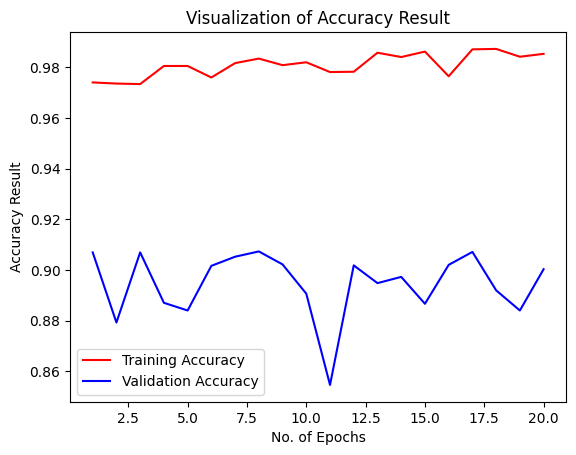

In [35]:
epochs = [i for i in range(1,21)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label ='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label ='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Creating Pipeline

## Saving Model

In [ ]:
cnn.save('trained_model.keras') # one extension of saving, not using h5 as keras takes less space

In [ ]:
training_history.history

In [ ]:
# storing history in json format
import json
with open('training_hist.json', 'w') as f:
  json.dumpt(training_history.history, f)